In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive

In [306]:
# drive.mount('/content/drive')

In [307]:
# give path to the data.csv 
file_path = '/content/data.csv' 

As one may see, the csv file contains actual labels and the predicted probabilities from two ML model (random forest and logistic regression).

In [308]:
df = pd.read_csv(file_path)
df.head()


,y_act,y_pred_random_forest,y_pred_logistic
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


In [309]:
lr_accur = []
lr_prec =[]
lr_rec = []
lr_f1score = []
rf_accur = []
rf_prec =[]
rf_rec = []
rf_f1score = []
thresold_value = [0.5,0.6,0.4]


You have to take a threshold value and will have to predict final label. 
So add two new columns named as 'y_pred_rf'and 'y_pred_lr' in the df dataframe. These new columns will have final label predicted by the two models based on the threshold set.

In [310]:
thresh = 0.5
df['y_pred_rf'] = (df.y_pred_random_forest >= thresh).astype('int')
df['y_pred_lr'] = (df.y_pred_logistic >= thresh).astype('int')
df.head()

,y_act,y_pred_random_forest,y_pred_logistic,y_pred_rf,y_pred_lr
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0


In [311]:
df.shape

(15758, 5)

Complete below function to compute true positive (tp), tn, fn, fp

In [312]:
def compute_tp_tn_fn_fp(y_act, y_pred):
  tp=0
  tn=0
  fn=0
  fp=0
  for i in range(len(y_act)):
    if(y_act[i]==y_pred[i]):
      if(y_act[i]==0):
        tn=tn+1
      else:
        tp=tp+1
    elif(y_act[i]==0 and y_pred[i]==1):
      fp=fp+1
    else:
      fn=fn+1
  
  
  return tp, tn, fp, fn

In [313]:
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(df.y_act, df.y_pred_lr)
print('TP for Logistic Reg :', tp_lr)
print('TN for Logistic Reg :', tn_lr)
print('FP for Logistic Reg :', fp_lr)
print('FN for Logistic Reg :', fn_lr)

TP for Logistic Reg : 4279
TN for Logistic Reg : 5425
FP for Logistic Reg : 2454
FN for Logistic Reg : 3600


In [314]:
tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(df.y_act, df.y_pred_rf)
print('TP for Random Forest :', tp_rf)
print('TN for Random Forest :', tn_rf)
print('FP for Random Forest :', fp_rf)
print('FN for Random Forest :', fn_rf)

TP for Random Forest : 5047
TN for Random Forest : 5519
FP for Random Forest : 2360
FN for Random Forest : 2832


Let's verify result from sklearn

In [315]:
from sklearn.metrics import confusion_matrix
tn_rf1, fp_rf1, fn_rf1, tp_rf1 = confusion_matrix(df.y_act, df.y_pred_rf).ravel()

In [316]:
print('TP for Random Forest :', tp_rf1)
print('TN for Random Forest :', tn_rf1)
print('FP for Random Forest :', fp_rf1)
print('FN for Random Forest :', fn_rf1)

TP for Random Forest : 5047
TN for Random Forest : 5519
FP for Random Forest : 2360
FN for Random Forest : 2832


In a similar way complete all the functions below

In [317]:
def compute_accuracy(tp, tn, fn, fp):
	acc = (tn+tp)/(tn+tp+fp+fn)
	return acc

In [318]:
print('Accuracy for Logistic Regression :', 100*compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Accuracy for Random Forest :', 100*compute_accuracy(tp_rf, tn_rf, fn_rf, fp_rf))
lr_accur.append(100*compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
rf_accur.append(100*compute_accuracy(tp_rf, tn_rf, fn_rf, fp_rf))

Accuracy for Logistic Regression : 61.58141896179718
Accuracy for Random Forest : 67.05165630156111


In [319]:
from sklearn.metrics import accuracy_score

In [320]:
print('Accuracy for Logistic Regression :', 100* accuracy_score(df.y_act, 
                                                           df.y_pred_lr))
print('Accuracy for Random Forest :', 100*accuracy_score(df.y_act, 
                                                           df.y_pred_rf))

Accuracy for Logistic Regression : 61.58141896179718
Accuracy for Random Forest : 67.05165630156111


In [321]:
def compute_precision(tp, tn, fn, fp):
	prec = tp/(tp+fp)
	return prec

In [322]:
print('Precision for Logistic Regression :', 100*compute_precision(tp_lr, tn_lr, fn_lr, fp_lr))
print('Precision for Random Forest :', 100*compute_precision(tp_rf, tn_rf, fn_rf, fp_rf))
lr_prec.append(100*compute_precision(tp_lr, tn_lr, fn_lr, fp_lr))
rf_prec.append(100*compute_precision(tp_rf, tn_rf, fn_rf, fp_rf))

Precision for Logistic Regression : 63.55265112134264
Precision for Random Forest : 68.1382476036182


In [323]:
from sklearn.metrics import precision_score
print('Precision for Logistic Regression :', 100* precision_score(df.y_act, 
                                                           df.y_pred_lr))
print('Precision for Random Forest :', 100* precision_score(df.y_act, 
                                                           df.y_pred_rf))

Precision for Logistic Regression : 63.55265112134264
Precision for Random Forest : 68.1382476036182


In [324]:
def compute_recall(tp, tn, fn, fp):
	rec = tp/(tp+fn)
	return rec

In [325]:
print('Recall for Logistic Regression :', 100*compute_recall(tp_lr, tn_lr, fn_lr, fp_lr))
print('Recall for Random Forest :', 100*compute_recall(tp_rf, tn_rf, fn_rf, fp_rf))
lr_rec.append(100*compute_recall(tp_lr, tn_lr, fn_lr, fp_lr))
rf_rec.append(100*compute_recall(tp_rf, tn_rf, fn_rf, fp_rf))

Recall for Logistic Regression : 54.30892245208783
Recall for Random Forest : 64.05635232897576


In [326]:
from sklearn.metrics import recall_score

print('Recall for Logistic Regression :', 100* recall_score(df.y_act, 
                                                           df.y_pred_lr))
print('Recall for Random Forest :', 100* recall_score(df.y_act, 
                                                           df.y_pred_rf))

Recall for Logistic Regression : 54.30892245208783
Recall for Random Forest : 64.05635232897576


In [327]:
def compute_f1_score(y_act, y_pred):
    # calculates the F1 score. Complete function
    tp=0
    tn=0
    fn=0
    fp=0
    for i in range(len(y_act)):
      if(y_act[i]==y_pred[i]):
        if(y_act[i]==0):
          tn=tn+1
        else:
          tp=tp+1
      elif(y_act[i]==0 and y_pred[i]==1):
        fp=fp+1
      else:
        fn=fn+1
      
    
    rec = compute_recall(tp, tn, fn, fp)
    prec = compute_precision(tp,tn,fn,fp)
    f1_score = 2*rec*prec/(prec+rec)


  
    return f1_score

In [328]:
print('F1 score for Logistic Regression :', compute_f1_score(df.y_act, 
                                                             df.y_pred_lr))
print('F1 score for Random Forest :', compute_f1_score(df.y_act, 
                                                             df.y_pred_rf))
lr_f1score.append(compute_f1_score(df.y_act, df.y_pred_lr))
rf_f1score.append(compute_f1_score(df.y_act, df.y_pred_rf))

F1 score for Logistic Regression : 0.5856830002737475
F1 score for Random Forest : 0.660342797330891


In [329]:
from sklearn.metrics import f1_score
print('F1 score for Logistic Regression :', f1_score(df.y_act, df.y_pred_lr))
print('F1 score for Random Forest :', f1_score(df.y_act, df.y_pred_rf))

F1 score for Logistic Regression : 0.5856830002737475
F1 score for Random Forest : 0.660342797330891


**FOR THRESOLD = 0.6**


In [330]:
thresh = 0.6
df['y_pred_rf'] = (df.y_pred_random_forest >= thresh).astype('int')
df['y_pred_lr'] = (df.y_pred_logistic >= thresh).astype('int')
df.head()

,y_act,y_pred_random_forest,y_pred_logistic,y_pred_rf,y_pred_lr
0,1,0.639816,0.531904,1,0
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,0
3,1,0.506616,0.443674,0,0
4,0,0.418302,0.369532,0,0


In [331]:
df.shape

(15758, 5)

In [332]:
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(df.y_act, df.y_pred_lr)
print('TP for Logistic Reg :', tp_lr)
print('TN for Logistic Reg :', tn_lr)
print('FP for Logistic Reg :', fp_lr)
print('FN for Logistic Reg :', fn_lr)

TP for Logistic Reg : 2406
TN for Logistic Reg : 6858
FP for Logistic Reg : 1021
FN for Logistic Reg : 5473


In [333]:
tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(df.y_act, df.y_pred_rf)
print('TP for Random Forest :', tp_rf)
print('TN for Random Forest :', tn_rf)
print('FP for Random Forest :', fp_rf)
print('FN for Random Forest :', fn_rf)

TP for Random Forest : 2239
TN for Random Forest : 7417
FP for Random Forest : 462
FN for Random Forest : 5640


In [334]:
from sklearn.metrics import confusion_matrix
tn_rf1, fp_rf1, fn_rf1, tp_rf1 = confusion_matrix(df.y_act, df.y_pred_rf).ravel()

In [335]:
print('TP for Random Forest :', tp_rf1)
print('TN for Random Forest :', tn_rf1)
print('FP for Random Forest :', fp_rf1)
print('FN for Random Forest :', fn_rf1)

TP for Random Forest : 2239
TN for Random Forest : 7417
FP for Random Forest : 462
FN for Random Forest : 5640


In [336]:
print('Accuracy for Logistic Regression :', 100*compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Accuracy for Random Forest :', 100*compute_accuracy(tp_rf, tn_rf, fn_rf, fp_rf))
lr_accur.append(100*compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
rf_accur.append(100*compute_accuracy(tp_rf, tn_rf, fn_rf, fp_rf))

Accuracy for Logistic Regression : 58.789186444980324
Accuracy for Random Forest : 61.276811778144435


In [337]:
from sklearn.metrics import accuracy_score

In [338]:
print('Accuracy for Logistic Regression :', 100* accuracy_score(df.y_act, 
                                                           df.y_pred_lr))
print('Accuracy for Random Forest :', 100*accuracy_score(df.y_act, 
                                                           df.y_pred_rf))

Accuracy for Logistic Regression : 58.789186444980324
Accuracy for Random Forest : 61.276811778144435


In [339]:
print('Precision for Logistic Regression :', 100*compute_precision(tp_lr, tn_lr, fn_lr, fp_lr))
print('Precision for Random Forest :', 100*compute_precision(tp_rf, tn_rf, fn_rf, fp_rf))
lr_prec.append(100*compute_precision(tp_lr, tn_lr, fn_lr, fp_lr))
rf_prec.append(100*compute_precision(tp_rf, tn_rf, fn_rf, fp_rf))

Precision for Logistic Regression : 70.20717829004961
Precision for Random Forest : 82.89522399111439


In [340]:
from sklearn.metrics import precision_score
print('Precision for Logistic Regression :', 100* precision_score(df.y_act, 
                                                           df.y_pred_lr))
print('Precision for Random Forest :', 100* precision_score(df.y_act, 
                                                           df.y_pred_rf))

Precision for Logistic Regression : 70.20717829004961
Precision for Random Forest : 82.89522399111439


In [341]:
print('Recall for Logistic Regression :', 100*compute_recall(tp_lr, tn_lr, fn_lr, fp_lr))
print('Recall for Random Forest :', 100*compute_recall(tp_rf, tn_rf, fn_rf, fp_rf))
lr_rec.append(100*compute_recall(tp_lr, tn_lr, fn_lr, fp_lr))
rf_rec.append(100*compute_recall(tp_rf, tn_rf, fn_rf, fp_rf))

Recall for Logistic Regression : 30.536870161187966
Recall for Random Forest : 28.417311841604263


In [342]:
from sklearn.metrics import recall_score

print('Recall for Logistic Regression :', 100* recall_score(df.y_act, 
                                                           df.y_pred_lr))
print('Recall for Random Forest :', 100* recall_score(df.y_act, 
                                                           df.y_pred_rf))

Recall for Logistic Regression : 30.536870161187966
Recall for Random Forest : 28.417311841604263


In [343]:
print('F1 score for Logistic Regression :', compute_f1_score(df.y_act, 
                                                             df.y_pred_lr))
print('F1 score for Random Forest :', compute_f1_score(df.y_act, 
                                                             df.y_pred_rf))
lr_f1score.append(compute_f1_score(df.y_act, df.y_pred_lr))
rf_f1score.append(compute_f1_score(df.y_act, df.y_pred_rf))

F1 score for Logistic Regression : 0.42561471784892974
F1 score for Random Forest : 0.42325141776937614


In [344]:
from sklearn.metrics import f1_score
print('F1 score for Logistic Regression :', f1_score(df.y_act, df.y_pred_lr))
print('F1 score for Random Forest :', f1_score(df.y_act, df.y_pred_rf))

F1 score for Logistic Regression : 0.42561471784892974
F1 score for Random Forest : 0.42325141776937614


**FOR THRESOLD = 0.4**

In [345]:
thresh = 0.4
df['y_pred_rf'] = (df.y_pred_random_forest >= thresh).astype('int')
df['y_pred_lr'] = (df.y_pred_logistic >= thresh).astype('int')
df.head()

,y_act,y_pred_random_forest,y_pred_logistic,y_pred_rf,y_pred_lr
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,1,1
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,1
4,0,0.418302,0.369532,1,0


In [346]:
df.shape

(15758, 5)

In [347]:
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(df.y_act, df.y_pred_lr)
print('TP for Logistic Reg :', tp_lr)
print('TN for Logistic Reg :', tn_lr)
print('FP for Logistic Reg :', fp_lr)
print('FN for Logistic Reg :', fn_lr)

TP for Logistic Reg : 6535
TN for Logistic Reg : 2862
FP for Logistic Reg : 5017
FN for Logistic Reg : 1344


In [348]:
tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(df.y_act, df.y_pred_rf)
print('TP for Random Forest :', tp_rf)
print('TN for Random Forest :', tn_rf)
print('FP for Random Forest :', fp_rf)
print('FN for Random Forest :', fn_rf)

TP for Random Forest : 7411
TN for Random Forest : 1930
FP for Random Forest : 5949
FN for Random Forest : 468


In [349]:
from sklearn.metrics import confusion_matrix
tn_rf1, fp_rf1, fn_rf1, tp_rf1 = confusion_matrix(df.y_act, df.y_pred_rf).ravel()

In [350]:
print('TP for Random Forest :', tp_rf1)
print('TN for Random Forest :', tn_rf1)
print('FP for Random Forest :', fp_rf1)
print('FN for Random Forest :', fn_rf1)

TP for Random Forest : 7411
TN for Random Forest : 1930
FP for Random Forest : 5949
FN for Random Forest : 468


In [351]:
print('Accuracy for Logistic Regression :', 100*compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
print('Accuracy for Random Forest :', 100*compute_accuracy(tp_rf, tn_rf, fn_rf, fp_rf))
lr_accur.append(100*compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))
rf_accur.append(100*compute_accuracy(tp_rf, tn_rf, fn_rf, fp_rf))

Accuracy for Logistic Regression : 59.633202183018156
Accuracy for Random Forest : 59.27782713542328


In [352]:
from sklearn.metrics import accuracy_score

In [353]:
print('Accuracy for Logistic Regression :', 100* accuracy_score(df.y_act, 
                                                           df.y_pred_lr))
print('Accuracy for Random Forest :', 100*accuracy_score(df.y_act, 
                                                           df.y_pred_rf))

Accuracy for Logistic Regression : 59.633202183018156
Accuracy for Random Forest : 59.27782713542328


In [354]:
print('Precision for Logistic Regression :', 100*compute_precision(tp_lr, tn_lr, fn_lr, fp_lr))
print('Precision for Random Forest :', 100*compute_precision(tp_rf, tn_rf, fn_rf, fp_rf))
lr_prec.append(100*compute_precision(tp_lr, tn_lr, fn_lr, fp_lr))
rf_prec.append(100*compute_precision(tp_rf, tn_rf, fn_rf, fp_rf))

Precision for Logistic Regression : 56.570290858725755
Precision for Random Forest : 55.471556886227546


In [355]:
from sklearn.metrics import precision_score
print('Precision for Logistic Regression :', 100* precision_score(df.y_act, 
                                                           df.y_pred_lr))
print('Precision for Random Forest :', 100* precision_score(df.y_act, 
                                                           df.y_pred_rf))

Precision for Logistic Regression : 56.570290858725755
Precision for Random Forest : 55.471556886227546


In [356]:
print('Recall for Logistic Regression :', 100*compute_recall(tp_lr, tn_lr, fn_lr, fp_lr))
print('Recall for Random Forest :', 100*compute_recall(tp_rf, tn_rf, fn_rf, fp_rf))
lr_rec.append(100*compute_recall(tp_lr, tn_lr, fn_lr, fp_lr))
rf_rec.append(100*compute_recall(tp_rf, tn_rf, fn_rf, fp_rf))

Recall for Logistic Regression : 82.94199771544612
Recall for Random Forest : 94.06015991877142


In [357]:
from sklearn.metrics import recall_score

print('Recall for Logistic Regression :', 100* recall_score(df.y_act, 
                                                           df.y_pred_lr))
print('Recall for Random Forest :', 100* recall_score(df.y_act, 
                                                           df.y_pred_rf))

Recall for Logistic Regression : 82.94199771544612
Recall for Random Forest : 94.06015991877142


In [358]:
print('F1 score for Logistic Regression :', compute_f1_score(df.y_act, 
                                                             df.y_pred_lr))
print('F1 score for Random Forest :', compute_f1_score(df.y_act, 
                                                             df.y_pred_rf))
lr_f1score.append(compute_f1_score(df.y_act, df.y_pred_lr))
rf_f1score.append(compute_f1_score(df.y_act, df.y_pred_rf))

F1 score for Logistic Regression : 0.6726365086717101
F1 score for Random Forest : 0.6978671312208673


In [359]:
from sklearn.metrics import f1_score
print('F1 score for Logistic Regression :', f1_score(df.y_act, df.y_pred_lr))
print('F1 score for Random Forest :', f1_score(df.y_act, df.y_pred_rf))

F1 score for Logistic Regression : 0.6726365086717101
F1 score for Random Forest : 0.6978671312208673


**Graphs for Better Understanding**

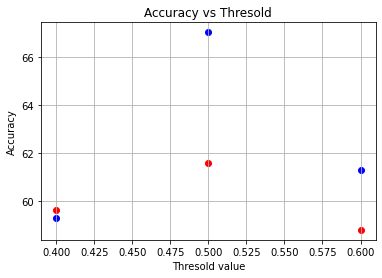

In [360]:
x = thresold_value
y = lr_accur
z = rf_accur
# red color for lr system and Blue color for rf system
plt.title("Accuracy vs Thresold")
plt.xlabel("Thresold value")
plt.ylabel("Accuracy")
plt.scatter(x,y, color = 'red')
plt.scatter(x,z, color = 'blue')
plt.grid()
plt.show()

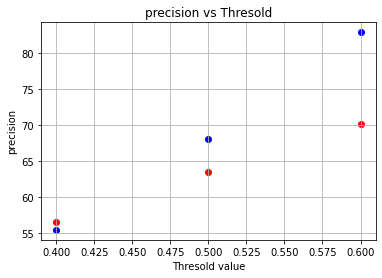

In [361]:
x = thresold_value
y = lr_prec
z = rf_prec
# red color for lr system and Blue color for rf system
plt.title("precision vs Thresold")
plt.xlabel("Thresold value")
plt.ylabel("precision")
plt.scatter(x,y, color = 'red')
plt.scatter(x,z, color = 'blue')
plt.grid()
plt.show()

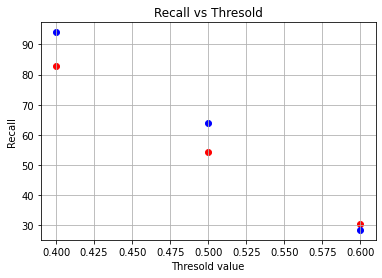

In [362]:
x = thresold_value
y = lr_rec
z = rf_rec
# red color for lr system and Blue color for rf system
plt.title("Recall vs Thresold")
plt.xlabel("Thresold value")
plt.ylabel("Recall")
plt.scatter(x,y, color = 'red')
plt.scatter(x,z, color = 'blue')
plt.grid()
plt.show()

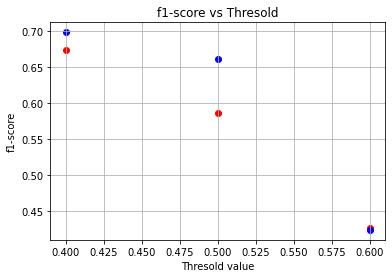

In [363]:
x = thresold_value
y = lr_f1score
z = rf_f1score
# red color for lr system and Blue color for rf system
plt.title("f1-score vs Thresold")
plt.xlabel("Thresold value")
plt.ylabel("f1-score")
plt.scatter(x,y, color = 'red')
plt.scatter(x,z, color = 'blue')
plt.grid()
plt.show()

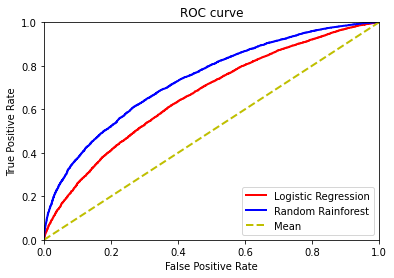

ROC-AUC of Logistic Regression: 0.665744
ROC-AUC of Random Rainforest: 0.738295


In [369]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
FPR1, TPR1, _ = metrics.roc_curve(df.y_act,df.y_pred_logistic)
FPR2,TPR2,_=metrics.roc_curve(df.y_act,df.y_pred_random_forest)
roc_aucl = metrics.auc(FPR1, TPR1)
roc_aucr = metrics.auc(FPR2,TPR2)

# Plot the ROC curve
plt.plot(FPR1, TPR1, color='red',lw=2, label='Logistic Regression')
plt.plot(FPR2, TPR2, color='blue',lw=2, label='Random Rainforest')
plt.plot([0, 1], [0, 1], color='y', lw=2, linestyle='--', label="Mean")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
print('ROC-AUC of Logistic Regression: %0.6f'%roc_aucl)
print('ROC-AUC of Random Rainforest: %0.6f'%roc_aucr)